In [1]:
import json
import numpy as np
import pandas as pd

!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
ny_neighborhoods_data = newyork_data['features']

column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
ny_neighborhoods = pd.DataFrame(columns=column_names)

for data in ny_neighborhoods_data:
    borough=neighborhood_name=data['properties']['borough']
    neighborhood_name=data['properties']['name']
    
    neighborhood_latlon=data['geometry']['coordinates']
    neighborhood_lat=neighborhood_latlon[1]
    neighborhood_lon=neighborhood_latlon[0]
    
    ny_neighborhoods=ny_neighborhoods.append({'Borough':borough,
                                       'Neighborhood':neighborhood_name,
                                       'Latitude':neighborhood_lat,
                                       'Longitude':neighborhood_lon},ignore_index=True)

#Now the New York neighborhoods "ny_neighborhoods" has 306x4, columns are 'Borough','Neighborhood','Latitude','Longitude'

In [2]:
ny_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [3]:
!pip install lxml
import pandas as pd # library for data analsysis

In [4]:
url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs = pd.read_html(url)[0]
#dfs is a dataframe object

df=dfs[dfs.Borough!="Not assigned"]
df=df.reset_index(drop=True)

for i in range(103):
    value=df.iloc[i]["Neighbourhood"]
    if value=="Not assigned":
        df.iloc[i]["Neighbourhood"]=df.iloc[i]["Borough"]
        print("find a NOT ASSIGNED")

#The above code is not actually used as there is no "Not assigned" value in column "Beighbourhood"

url="http://cocl.us/Geospatial_data"

import pandas
geo_df = pandas.read_csv(url)

tr_df=(df.join(geo_df.set_index('Postal Code'),on='Postal Code')).copy()
#learned from: manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

tr_neighborhoods=tr_df.drop('Postal Code',axis=1)
tr_neighborhoods.rename(columns={'Neighbourhood':'Neighborhood'},inplace=True)
#Change the column name from "Neighbourhood" to "Neighborhood" to have the same speling as New York data

#Now the Toronto neighborhoods "tr_neighborhoods" has 103x4, columns are 'Borough','Neighbourhood','Latitude','Longitude'

In [5]:
tr_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [6]:
### I prefer using Code + "#" instead of "Markdown" for the comments. It is more neat and clear

### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
### Now we have
### ny_neighborhoods 306x4
###  tr_neighborhoods 103 x4
###  'Borough','Neighbourhood','Latitude','Longitude'
### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***

In [7]:
#! conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

In [8]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

#The New York location info is retrived as Lat=0.7127281, Lon=-74.0060152

In [9]:
!pip install folium
import folium

     |████████████████████████████████| 94 kB 4.9 MB/s  eta 0:00:01


In [10]:
map_newyork=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, neighborhood in zip(ny_neighborhoods['Latitude'],ny_neighborhoods['Longitude'],ny_neighborhoods['Borough'],ny_neighborhoods['Neighborhood']):
    label='{},{}'.format(neighborhood,borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
map_newyork

#Show the neighborhoods in New York Map

In [11]:
latitude=43.6532
longitude=-79.3832

map_toronto=folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, borough, neighborhood in zip(tr_neighborhoods['Latitude'],tr_neighborhoods['Longitude'],tr_neighborhoods['Borough'],tr_neighborhoods['Neighborhood']):
    label='{},{}'.format(neighborhood,borough)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker(
        [lat,lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
map_toronto

#Show the neighborhoods in Toronto Map

In [12]:
### I prefer using Code + "#" instead of "Markdown" for the comments. It is more neat and clear

### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***
### Now we have checked
### neighborhoods in New York: 306 point
### neighborhoods in Toronto: 103 point
###  'Borough','Neighbourhood','Latitude','Longitude'
### *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** *** ***

In [13]:
CLIENT_ID = '4BLKWPUP0EYC2U4UGAI3YQVWR5NDYHVDF1VNHK41DHG1EWVV'
CLIENT_SECRET = '4HYGXEIO145QTOAN4BOHOQNFWDWUSKF3HI3Q2EWZ4GHJIG3J'
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
ACCESS_TOKEN = 'XECU25SP52OQUWQJK2DPP42QKAZDRPTHDWOPZCKPJ1DQLGLK' 

# Query related access credentials

import requests

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

# Define a function
# Input: 
#    Neiborhood name arracy
#    Neiborhood latitude array
#    Neiborhood langitude array
# Output/return:
#    the list of nearby venues with columns of 
#       Neighborhood
#       Neighborhood Latitude
#       Neighborhood Longitude
#       Venue (the name of vanue)
#       Venue Latitude
#       Venue Longtitude
#       Venue Category

In [15]:
names=ny_neighborhoods['Neighborhood']
latitudes=ny_neighborhoods['Latitude']
longitudes=ny_neighborhoods['Longitude']
newyork_venues=getNearbyVenues(names, latitudes, longitudes, radius=500)

# manhatten_data -> ny_neighborhoods

# newyork_venues.shape now has 10091x7. The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

In [17]:
names=tr_neighborhoods['Neighborhood']
latitudes=tr_neighborhoods['Latitude']
longitudes=tr_neighborhoods['Longitude']
toronto_venues=getNearbyVenues(names, latitudes, longitudes, radius=500)

# toronto_venues.shape now has 2123x7. The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [18]:
for name in tr_neighborhoods['Neighborhood']:
    print(name)


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [19]:
from project_lib import Project

project = Project(project_id='50c3aaa3-b6f1-4296-9ebc-9af18ee896c8', project_access_token='p-c4dea1043afcc2bf1ff7062dc32071e3ff42975f')
pc = project.project_context
project.save_data(file_name = "newyork_venues.csv",data = newyork_venues.to_csv(index=False),overwrite=True)
project.save_data(file_name = "toronto_venues.csv",data = toronto_venues.to_csv(index=False),overwrite=True)

# save the New York Venues into a csv file in IBM stroage
# The reason why to introduce this step is because there are lot of queries during the prorgaming test. 
# The queries can be saved by calling out the data directly from this step by reading the csv file from IBM storage
# The project ID and Token are used to access the storage
# #####
# ####
# ###
# ##
# #
#

{'file_name': 'toronto_venues.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',
 'asset_id': '8bb8b3fe-ff57-4542-822f-850a83b6a634'}

In [73]:
# The code was removed by Watson Studio for sharing.

In [74]:
# Check some details of the records if needed
# newyork_venues.head()
# newyork_venues.shape

In [75]:
body = client_d336738e189a4a92a957fc2b7a47a38f.get_object(Bucket='tontonroandnewyork-donotdelete-pr-h3aecrslfue2lf',Key='toronto_venues.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

toronto_venues = pd.read_csv(body)



# Now the “toronto_venues” has the venue info 2123x7 The columns: Neighborhood / Neighborhood Latitude / Neighborhood Longitude / Venue (the name of vanue) / Venue Latitude / Venue Longtitude / Venue Category

In [76]:
# Check some details of the records if needed
# toronto_venues.head()
# toronto_venues.shape

In [77]:
print("New York")
print(newyork_venues.head())
print(newyork_venues.shape)
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

print("Toronto")
print(toronto_venues.head())
print(toronto_venues.shape)
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

New York
  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude  Venue Category  
0  Lollipops Gelato       40.894123       -73.845892    Dessert Shop  
1          Rite Aid       40.896649       -73.844846        Pharmacy  
2         Walgreens       40.896528       -73.844700        Pharmacy  
3  Carvel Ice Cream       40.890487       -73.848568  Ice Cream Shop  
4           Dunkin'       40.890459       -73.849089      Donut Shop  
(10039, 7)
There are 433 uniques categories.
Toronto
       Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0         Parkwoods              43.753259         

In [78]:
print('There are {} uniques categories.'.format(len(newyork_venues['Venue Category'].unique())))

There are 433 uniques categories.


In [79]:
### List of the top venue categories of ***New York***neighborhoods
### (1) 

# one hot encoding
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
newyork_onehot['Neighborhood'] = newyork_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]

# Grouped into neighborhoods
newyork_grouped = newyork_onehot.groupby('Neighborhood').mean().reset_index()

# Now newyork_ground is 302x436 (number of neighborhoods x number of venue categories)

In [27]:
### List of the top venue categories of ***New York***neighborhoods
### (2) have a check of the top 5 venues frequncies (value 0~1)

num_top_venues = 5

for hood in newyork_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = newyork_grouped[newyork_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
                venue  freq
0         Pizza Place  0.12
1       Deli / Bodega  0.08
2         Supermarket  0.08
3  Chinese Restaurant  0.08
4    Department Store  0.04


----Annadale----
           venue  freq
0   Liquor Store  0.11
1          Diner  0.11
2  Train Station  0.11
3           Park  0.11
4    Pizza Place  0.11


----Arden Heights----
          venue  freq
0      Pharmacy  0.25
1   Coffee Shop  0.25
2      Bus Stop  0.25
3   Pizza Place  0.25
4  Outlet Store  0.00


----Arlington----
                 venue  freq
0        Boat or Ferry   0.2
1        Deli / Bodega   0.2
2  American Restaurant   0.2
3         Home Service   0.2
4         Intersection   0.2


----Arrochar----
                venue  freq
0            Bus Stop  0.14
1  Italian Restaurant  0.09
2         Pizza Place  0.09
3       Deli / Bodega  0.09
4        Liquor Store  0.05


----Arverne----
           venue  freq
0      Surf Spot  0.21
1  Metro Station  0.11
2     Playground  0.05
3    Coffee

In [80]:
# Define a function to return the most frequent venues
# Input: list of venure frequency of a specific neighborhood, numer of top venues you want to check
# Output: The top venue categories of the specific neighborhood

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [81]:
### List of the top venue categories of ***New York***neighborhoods
### (3) have each neighborhood a list of top vanue categories

import numpy as np

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
newyork_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
newyork_neighborhoods_venues_sorted['Neighborhood'] = newyork_grouped['Neighborhood']
for ind in np.arange(newyork_grouped.shape[0]):
    newyork_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)
newyork_neighborhoods_venues_sorted.head()

# newyork_neighborhoods_venues_sorted has 302 x11 

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Supermarket,Playground,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Martial Arts School,Pharmacy
1,Annadale,Pizza Place,Diner,Pharmacy,Liquor Store,Train Station,Restaurant,Park,Deli / Bodega,American Restaurant,Food Truck
2,Arden Heights,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,Arlington,Boat or Ferry,Deli / Bodega,American Restaurant,Intersection,Home Service,Flea Market,Factory,Falafel Restaurant,Farm,Farmers Market
4,Arrochar,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Liquor Store,Food Truck,Outdoors & Recreation,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant


In [82]:
### List of the top venue categories of ***Toronto*** neighborhoods
### (1) 

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

# Grouped into neighborhoods
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

# Now toronto_ground is 96x436 (number of neighborhoods x number of venue categories)

In [83]:
### List of the top venue categories of ***Toronto***neighborhoods
### (2) have a check of the top 5 venues frequncies (value 0~1)

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0             Clothing Store   0.2
1                     Lounge   0.2
2             Breakfast Spot   0.2
3  Latin American Restaurant   0.2
4               Skating Rink   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.25
1     Coffee Shop  0.12
2    Skating Rink  0.12
3  Sandwich Place  0.12
4             Pub  0.12


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.09
1                       Bank  0.09
2                   Pharmacy  0.05
3  Middle Eastern Restaurant  0.05
4              Shopping Mall  0.05


----Bayview Village----
                 venue  freq
0                 Café  0.25
1  Japanese Restaurant  0.25
2   Chinese Restaurant  0.25
3                 Bank  0.25
4               Museum  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0       Italian Restaurant  0.08
1              Co

In [84]:
### List of the top venue categories of ***Toronto***neighborhoods
### (3) have each neighborhood a list of top vanue categories

import numpy as np

num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
toronto_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
toronto_neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']
for ind in np.arange(toronto_grouped.shape[0]):
    toronto_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
toronto_neighborhoods_venues_sorted.head()

# toronto_neighborhoods_venues_sorted has 96 x11

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Clothing Store,Breakfast Spot,Electronics Store,Eastern European Restaurant,Ethiopian Restaurant,Event Space,Dim Sum Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Skating Rink,Coffee Shop,Pub,Sandwich Place,Gym,Airport Lounge,Farmers Market,Event Space
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Sandwich Place,Supermarket,Mobile Phone Shop,Ice Cream Shop,Restaurant,Deli / Bodega,Fried Chicken Joint,Frozen Yogurt Shop
3,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Thai Restaurant,Boutique,Fast Food Restaurant,Juice Bar,Restaurant,Butcher,Indian Restaurant


In [85]:
# This part is doing
# CLutsering of the neighborhoods
# Ploting the venue clusters in the map
#######################################################
###                                                 ###
###   This is an important part of the analysis     ###
###                                                 ###   
######################################################

# newyork_neighborhoods_venues_sorted has 302 x11
# toronto_neighborhoods_venues_sorted has 96 x11

In [86]:
# If folium is not installed and imported, excute the following 2 lines
#!pip install folium
#import folium

from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [87]:
# This line is used to remove the inserted column "Cluster Labels" during debug
### ### ###
# newyork_neighborhoods_venues_sorted=newyork_neighborhoods_venues_sorted.drop('Cluster Labels',1)

In [88]:
newyork_neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Supermarket,Playground,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Martial Arts School,Pharmacy
1,Annadale,Pizza Place,Diner,Pharmacy,Liquor Store,Train Station,Restaurant,Park,Deli / Bodega,American Restaurant,Food Truck
2,Arden Heights,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,Arlington,Boat or Ferry,Deli / Bodega,American Restaurant,Intersection,Home Service,Flea Market,Factory,Falafel Restaurant,Farm,Farmers Market
4,Arrochar,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Liquor Store,Food Truck,Outdoors & Recreation,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant


In [89]:
# Cluster newyork and marked in map

kclusters = 5
newyork_grouped_clustering = newyork_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(newyork_grouped_clustering)
kmeans.labels_[0:10] 

newyork_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
newyork_merged = ny_neighborhoods
newyork_merged = newyork_merged.join(newyork_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

newyork_merged = newyork_merged.fillna(0)
newyork_merged['Cluster Labels']=newyork_merged['Cluster Labels'].astype(int)

# New York Latitude and Longitute
latitude=40.7127281
longitude=-74.0060152

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighborhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [90]:
newyork_neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Allerton,Pizza Place,Chinese Restaurant,Deli / Bodega,Supermarket,Playground,Mexican Restaurant,Fast Food Restaurant,Fried Chicken Joint,Martial Arts School,Pharmacy
1,1,Annadale,Pizza Place,Diner,Pharmacy,Liquor Store,Train Station,Restaurant,Park,Deli / Bodega,American Restaurant,Food Truck
2,1,Arden Heights,Pizza Place,Pharmacy,Coffee Shop,Bus Stop,Women's Store,Factory,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
3,1,Arlington,Boat or Ferry,Deli / Bodega,American Restaurant,Intersection,Home Service,Flea Market,Factory,Falafel Restaurant,Farm,Farmers Market
4,1,Arrochar,Bus Stop,Italian Restaurant,Pizza Place,Deli / Bodega,Liquor Store,Food Truck,Outdoors & Recreation,Mediterranean Restaurant,Middle Eastern Restaurant,Polish Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
297,1,Woodhaven,Deli / Bodega,Park,Bank,Pharmacy,Department Store,Latin American Restaurant,Fried Chicken Joint,Supermarket,Mexican Restaurant,Chinese Restaurant
298,1,Woodlawn,Deli / Bodega,Pub,Pizza Place,Playground,Food & Drink Shop,Food Truck,Liquor Store,Bakery,Bar,Grocery Store
299,1,Woodrow,Sushi Restaurant,Donut Shop,Mexican Restaurant,Martial Arts School,Grocery Store,Miscellaneous Shop,Coffee Shop,Bakery,Bagel Shop,Pharmacy
300,1,Woodside,Grocery Store,Thai Restaurant,Filipino Restaurant,Latin American Restaurant,Bakery,Pub,American Restaurant,Donut Shop,Bar,Deli / Bodega


In [91]:
newyork_neighborhoods_venues_sorted['1st Most Common Venue'].value_counts()

Pizza Place           36
Italian Restaurant    24
Deli / Bodega         22
Coffee Shop           17
Chinese Restaurant    13
                      ..
Music Venue            1
Mobile Phone Shop      1
Cocktail Bar           1
Pool                   1
Lounge                 1
Name: 1st Most Common Venue, Length: 81, dtype: int64

In [92]:
# This line is used to remove the inserted column "Cluster Labels" during debug
### ### ###
# toronto_neighborhoods_venues_sorted=toronto_neighborhoods_venues_sorted.drop('Cluster Labels',1)

In [93]:
# Cluster toronto and marked in map

kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:10] 

toronto_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = tr_neighborhoods
toronto_merged = toronto_merged.join(toronto_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged = toronto_merged.fillna(0)
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

# Toronto Latitude and Longitute
latitude=43.6532
longitude=-79.3832

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans.labels_))))
rainbow = [colors.rgb2hex(i) for i in colors_array]

#toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [94]:
toronto_merged = toronto_merged.fillna(0)
toronto_merged['Cluster Labels']=toronto_merged['Cluster Labels'].astype(int)

In [95]:
tr_neighborhoods

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...
98,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [96]:
newyork_merged['Cluster Labels'].value_counts()

1    292
0      8
3      4
4      1
2      1
Name: Cluster Labels, dtype: int64

In [97]:
toronto_merged['Cluster Labels'].value_counts()

1    87
0    12
2     2
4     1
3     1
Name: Cluster Labels, dtype: int64

In [98]:
toronto_merged.shape

(103, 15)

In [99]:
df_cluster = newyork_merged[(newyork_merged['Cluster Labels'] ==1)]
df_cluster['1st Most Common Venue'].value_counts()

Pizza Place                  37
Italian Restaurant           23
Deli / Bodega                22
Coffee Shop                  18
Chinese Restaurant           13
                             ..
Farmers Market                1
American Restaurant           1
Halal Restaurant              1
College Academic Building     1
Lounge                        1
Name: 1st Most Common Venue, Length: 79, dtype: int64

In [ ]:
# Now we know in New York, 
# 1    292 
#      Pizza Place                  37
#      Italian Restaurant           23
#      Deli / Bodega                22
#      Coffee Shop                  18
#      Chinese Restaurant           13

In [100]:
df_cluster = toronto_merged[(toronto_merged['Cluster Labels'] ==1)]
df_cluster['1st Most Common Venue'].value_counts()

Coffee Shop               21
Pizza Place               12
Café                       7
Grocery Store              6
Clothing Store             3
Pharmacy                   3
Fast Food Restaurant       2
Indian Restaurant          2
Furniture / Home Store     2
Gym                        2
Intersection               1
Motel                      1
Tennis Court               1
Jewelry Store              1
Basketball Court           1
Spa                        1
Bar                        1
Home Service               1
Yoga Studio                1
Garden                     1
Field                      1
Breakfast Spot             1
Lounge                     1
Gym / Fitness Center       1
Hakka Restaurant           1
Bakery                     1
Truck Stop                 1
Airport Service            1
River                      1
Bus Line                   1
Pub                        1
Greek Restaurant           1
Department Store           1
Ramen Restaurant           1
Sandwich Place

In [ ]:
# Now we know in Toronto, 
# 1    87
#     Coffee Shop               21
#     Pizza Place               12
#     Café                       7
#     Grocery Store              6

Text(0.5, 1.0, 'Top NewYork Venues')

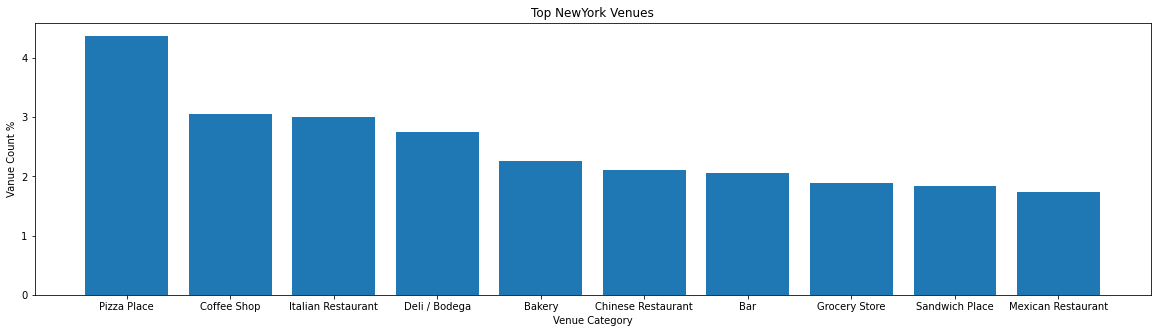

In [160]:
newyork_top=newyork_venues['Venue Category'].value_counts()[0:10]
#newyork_top

newyork_top_df=pd.DataFrame({'Venue Category':newyork_top.index, 'Vanue Count':newyork_top.values})
newyork_top_df['Vanue Count']=newyork_top_df['Vanue Count']/10091*100

#newyork_top_df

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=newyork_top_df['Venue Category']

fig=pyplot.gcf()
fig.set_size_inches(20,5)

pyplot.bar(group_names, newyork_top_df['Vanue Count'])

plt.pyplot.xlabel("Venue Category")
plt.pyplot.ylabel("Vanue Count %")
plt.pyplot.title("Top NewYork Venues")

Text(0.5, 1.0, 'Top Toronto Venues')

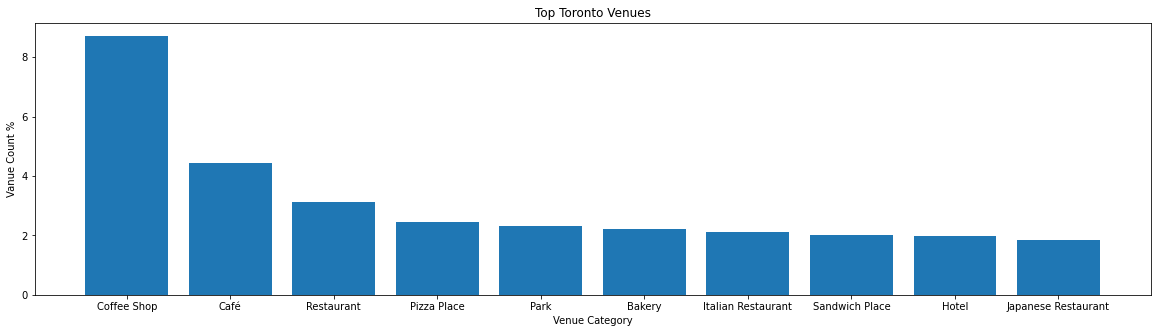

In [162]:
toronto_top=toronto_venues['Venue Category'].value_counts()[0:10]
#toronto_top

toronto_top_df=pd.DataFrame({'Venue Category':toronto_top.index, 'Vanue Count':toronto_top.values})
toronto_top_df['Vanue Count']=toronto_top_df['Vanue Count']/2123*100

#toronto_top_df

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
group_names=toronto_top_df['Venue Category']

fig=pyplot.gcf()
fig.set_size_inches(20,5)

pyplot.bar(group_names, toronto_top_df['Vanue Count'])

plt.pyplot.xlabel("Venue Category")
plt.pyplot.ylabel("Vanue Count %")
plt.pyplot.title("Top Toronto Venues")